# Study of the iterative calculation of surface Green's function
I will use this notebook to study the convergence properties of the surface Green's function and the problems associated with it because of a finite superconducting order parameter.

In [221]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize
%load_ext line_profiler

In [268]:
def calc_surface_g(E,alpha,beta,eta,eps=1e-8,max_iter=1000,kappa=0.5):
    def func_g(g,E,alpha,beta,eta):
        return np.linalg.inv((E + 1j*eta)*np.eye(alpha.shape[0])- alpha - beta @ g @ np.conj(beta).T)
   
    g0 = np.zeros(alpha.shape)
    g = np.zeros(alpha.shape)
    
    err_vec = []
    for i in range(max_iter):
        g = func_g(g,E,alpha,beta,eta)
        g = ((1-kappa)*g + kappa*g0)
        err = np.linalg.norm(g - g0)
        err_vec.append(err)
        g0 = np.copy(g)
        if err < eps:
            break
    return g,err_vec

In [269]:
t = 100e-3
mu = 5e-3
Delta = 1e-3
alpha = np.array([[2*t - mu,Delta],[np.conj(Delta),-2*t + mu]])
beta = np.array([[-t,0],[0,t]])

E = 2e-3 
eta = 1e-4

[[-9.67076974-2.90198431j -0.03648546-1.25601797j]
 [-0.03648546-1.25601797j  9.77603149-2.12938467j]]


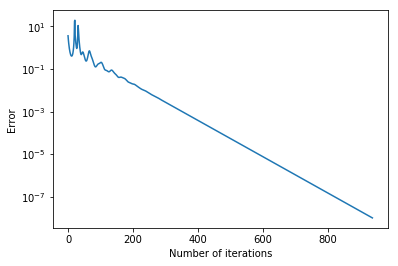

In [273]:
%lprun -f calc_surface_g g,err_vec = calc_surface_g(E,alpha,beta,eta,max_iter=100000,kappa=0.5)
print(g)
plt.semilogy(err_vec)
plt.ylabel('Error')
plt.xlabel('Number of iterations')

# Notes
- I am abandoning the solution on fixed point or root solvers, moving to recursion written by me; as correctness is more important than speed

- The iterative method is not converging outside the gap; it converges if eta is set to a large value
As the eta value is decreased, the number of iterations required to converge also increases.

- time is 0.50s for eta = 1e-4 and eps = 1e-8 and takes about 4000 iterations

- updating g = 0.5*(g + g0) improves time to 0.050s

In [272]:
for kappa in np.linspace(0.1,1,10):
    print(kappa)
    %timeit g,err_vec = calc_surface_g(E,alpha,beta,eta,max_iter=100000,kappa=kappa)

0.1
91.1 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.2
67.1 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.3
59.1 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.4
58.6 ms ± 9.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.5
53.5 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.6
63.8 ms ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.7
69.6 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.8
89.2 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.9
167 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.0
67.4 µs ± 2.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
